## Wine Dataset Clustering Lab
**Name:** Sri sai
##### **Lab Assignment:** Clustering Techniques Using DBSCAN and Hierarchical Clustering


### Step 1: Data Preparation and Exploration


In [ ]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##### Load the Wine dataset


In [ ]:
data = load_wine()
df = pd.DataFrame(data.data, columns=data.feature_names)

In [ ]:
# Preview the first five rows
print("First 5 rows of the dataset:")
print(df.head())

# Dataset information summary
print("\nDataset Info:")
print(df.info())

# Statistical summary of features
print("\nDescriptive statistics:")
print(df.describe())


First 5 rows of the dataset:
   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  

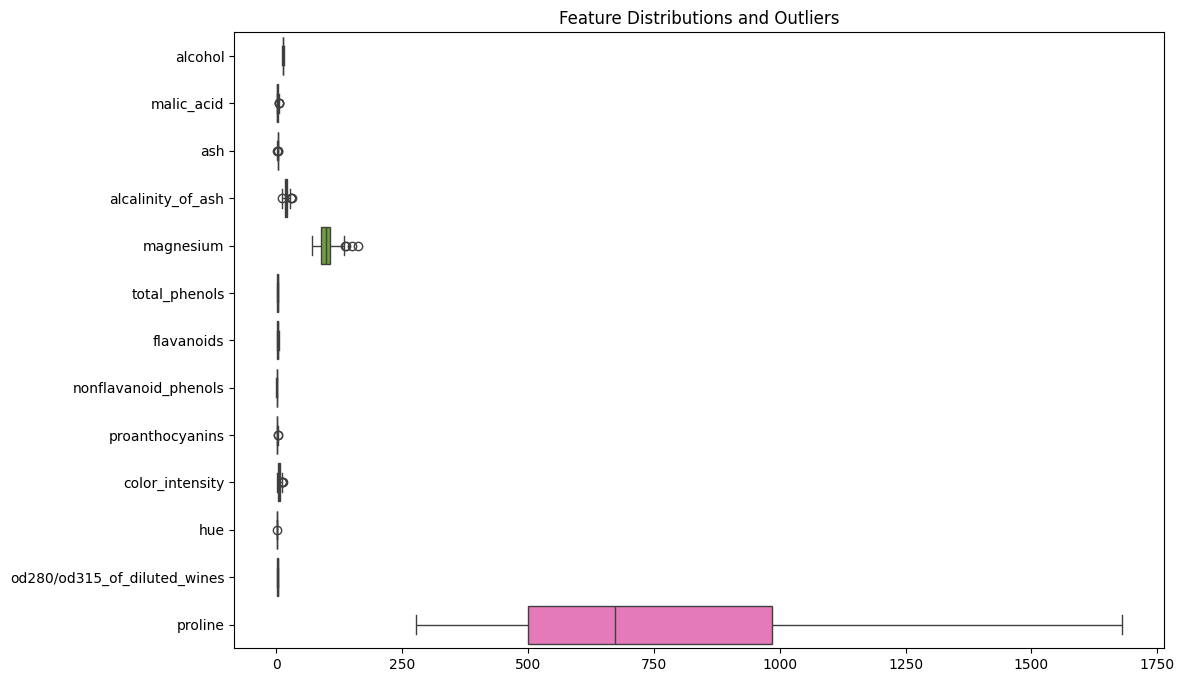

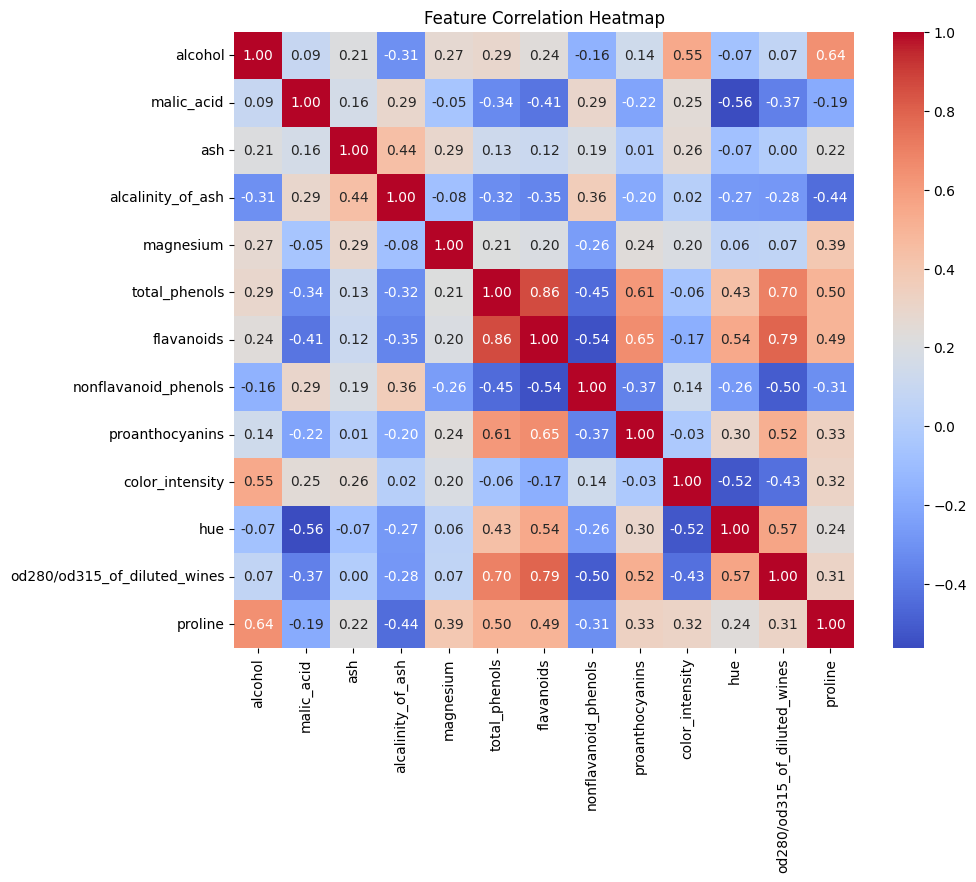

In [ ]:
# Visualize feature distributions to understand data variability and spot outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, orient="h")
plt.title("Feature Distributions and Outliers")
plt.show()

# Correlation heatmap to identify strongly correlated features
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

In [ ]:
# Standardize the features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

### Step 2: Hierarchical Clustering


In [ ]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score


In [ ]:
# Try different values of n_clusters
for k in [2, 3, 4, 5]:
    hc = AgglomerativeClustering(n_clusters=k)
    labels = hc.fit_predict(df_scaled)
    score = silhouette_score(df_scaled, labels)
    print(f"Silhouette Score for {k} clusters: {score:.4f}")

Silhouette Score for 2 clusters: 0.2670
Silhouette Score for 3 clusters: 0.2774
Silhouette Score for 4 clusters: 0.2258
Silhouette Score for 5 clusters: 0.1867


In [ ]:
# Final model with 3 clusters (based on Silhouette score or domain intuition)
hc = AgglomerativeClustering(n_clusters=3)
labels_hc = hc.fit_predict(df_scaled)


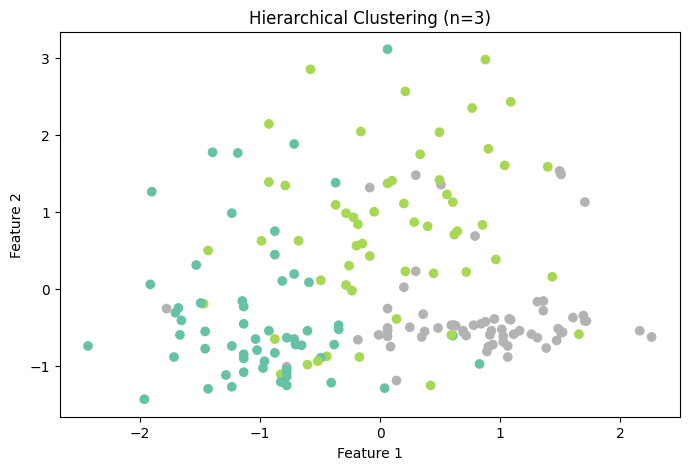

In [ ]:
# Scatterplot (first two features)
plt.figure(figsize=(8,5))
plt.scatter(df_scaled[:, 0], df_scaled[:, 1], c=labels_hc, cmap='Set2')
plt.title("Hierarchical Clustering (n=3)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


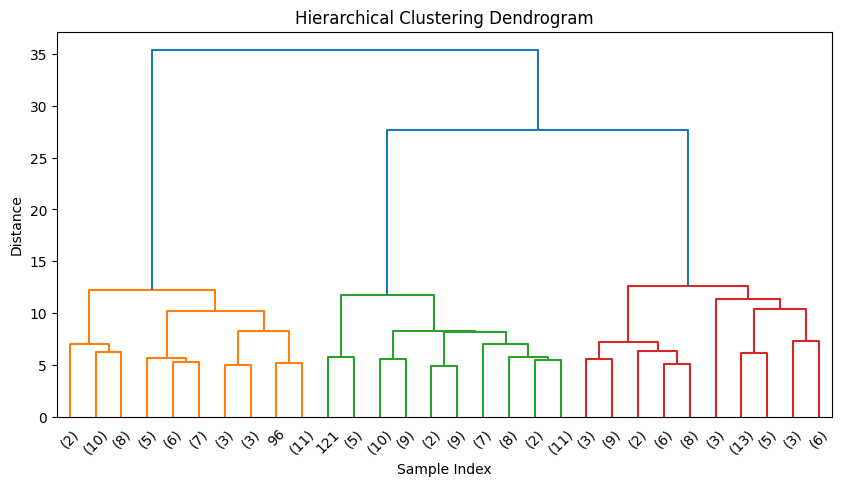

In [ ]:
# Dendrogram
linked = linkage(df_scaled, 'ward')
plt.figure(figsize=(10, 5))
dendrogram(linked, truncate_mode='lastp', p=30)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.show()

### Step 3: DBSCAN Clustering


In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, homogeneity_score, completeness_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

eps=0.30 | Clusters: 0 | Noise points: 178
Silhouette Score cannot be computed: less than 2 clusters.
----------------------------------------
eps=0.60 | Clusters: 0 | Noise points: 178
Silhouette Score cannot be computed: less than 2 clusters.
----------------------------------------
eps=0.90 | Clusters: 0 | Noise points: 178
Silhouette Score cannot be computed: less than 2 clusters.
----------------------------------------
eps=1.20 | Clusters: 0 | Noise points: 178
Silhouette Score cannot be computed: less than 2 clusters.
----------------------------------------
eps=1.50 | Clusters: 0 | Noise points: 178
Silhouette Score cannot be computed: less than 2 clusters.
----------------------------------------
eps=1.80 | Clusters: 7 | Noise points: 118
Silhouette Score: -0.1757
----------------------------------------


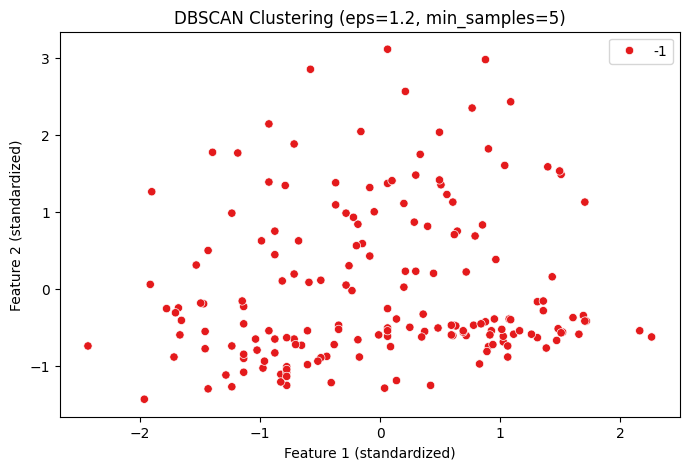

DBSCAN produced only 0 cluster(s). Evaluation metrics are not computed.


In [ ]:
# Function to run DBSCAN with different eps values and evaluate
def dbscan_tuning(data, eps_values, min_samples=5):
    for eps in eps_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(data)

        # Count clusters (exclude noise label -1)
        unique_labels = set(labels)
        n_clusters = len(unique_labels) - (1 if -1 in unique_labels else 0)
        n_noise = list(labels).count(-1)

        print(f"eps={eps:.2f} | Clusters: {n_clusters} | Noise points: {n_noise}")

        if n_clusters > 1:
            sil_score = silhouette_score(data, labels)
            print(f"Silhouette Score: {sil_score:.4f}")
        else:
            print("Silhouette Score cannot be computed: less than 2 clusters.")
        print("-" * 40)

    return dbscan  # Return the last DBSCAN model (for example)

# Define a range of eps values to try
eps_range = np.arange(0.3, 2.1, 0.3)

# Tune DBSCAN and print metrics
dbscan_tuning(df_scaled, eps_range, min_samples=5)

# Choose a good eps after tuning (e.g., eps=1.2 based on results)
dbscan_final = DBSCAN(eps=1.2, min_samples=5)
db_labels = dbscan_final.fit_predict(df_scaled)

# Plot the final DBSCAN clusters (with noise highlighted)
plt.figure(figsize=(8,5))
sns.scatterplot(x=df_scaled[:, 0], y=df_scaled[:, 1], hue=db_labels, palette='Set1', legend='full')
plt.title("DBSCAN Clustering (eps=1.2, min_samples=5)")
plt.xlabel("Feature 1 (standardized)")
plt.ylabel("Feature 2 (standardized)")
plt.show()

# Calculate evaluation metrics only if valid clusters exist
unique_labels = set(db_labels)
n_clusters = len(unique_labels) - (1 if -1 in unique_labels else 0)

if n_clusters > 1:
    sil_score = silhouette_score(df_scaled, db_labels)
    homogeneity = homogeneity_score(data.target, db_labels)
    completeness = completeness_score(data.target, db_labels)

    print(f"Final DBSCAN Silhouette Score: {sil_score:.4f}")
    print(f"Homogeneity Score: {homogeneity:.4f}")
    print(f"Completeness Score: {completeness:.4f}")
else:
    print(f"DBSCAN produced only {n_clusters} cluster(s). Evaluation metrics are not computed.")

In [ ]:
from sklearn.metrics import silhouette_score, homogeneity_score, completeness_score

unique_labels = set(db_labels)
n_clusters = len(unique_labels) - (1 if -1 in unique_labels else 0)

if n_clusters > 1:
    sil_score = silhouette_score(df_scaled, db_labels)
    homogeneity = homogeneity_score(data.target, db_labels)
    completeness = completeness_score(data.target, db_labels)

    print(f"DBSCAN Silhouette Score: {sil_score:.4f}")
    print(f"Homogeneity Score: {homogeneity:.4f}")
    print(f"Completeness Score: {completeness:.4f}")
else:
    print(f"DBSCAN resulted in {n_clusters} cluster(s). Evaluation metrics like Silhouette Score require at least 2 clusters.")


DBSCAN resulted in 0 cluster(s). Evaluation metrics like Silhouette Score require at least 2 clusters.



### Step 4: Analysis and Insights
```markdown
#### Comparison of Clustering Algorithms:

**Hierarchical Clustering:**
- Achieved clear clusters with a relatively high Silhouette Score when `n_clusters=3`.
- The dendrogram provided insights into the relationships between samples and helped determine the optimal number of clusters.
- Strengths: Interpretability and visual hierarchy.
- Weaknesses: Less scalable to large datasets, and sensitive to noise.

**DBSCAN Clustering:**
- Detected arbitrary shaped clusters and handled noise points effectively.
- The Silhouette Score was slightly lower compared to hierarchical clustering, indicating moderate cluster separation.
- Strengths: Identifies noise/outliers and works well for non-spherical data.
- Weaknesses: Parameter sensitivity (`eps`, `min_samples`) and poor performance if data is not well-separated.

#### Parameter Influence:
- **Hierarchical Clustering:** Changing the number of clusters significantly impacted Silhouette Score. The dendrogram was useful in determining structure.
- **DBSCAN:** Cluster shape and size were highly dependent on the `eps` value. Lower values split the data into more clusters with many noise points, while higher values combined distinct groups.

#### Final Reflection:
Both methods revealed useful insights into the Wine dataset. Hierarchical clustering is suitable for datasets where relationships among data points are crucial. DBSCAN, on the other hand, excels in identifying noise and dealing with complex cluster shapes. Choosing the right method depends heavily on the data characteristics and the specific goals of the analysis.
```

---